# Regresión polinomial

La regresion lineal tanto univariante como multivariante asumen que existe una relación lineal entre las variables dependientes e independientes, pero es habitual encontrar que los datos reales que recopilamos presentan relaciones que no son lineales. En estos casos es posible realizar una regresión polinomial. Por ejemplo, podemos estudiar cómo se relacionan el número de millas que una persona camina cada día y la edad de dicha persona usando una ecuación cuadrática.

Comenzamos como siempre cargando las librerías que necesitaremos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(1234)

Ahora creamos un conjunto de datos ficticio, en el que el número de millas recorridas crece con la edad hasta 40, y luego comienza a decrecer:

In [2]:
kms = np.random.normal(5, 2, 50)
ages = np.random.normal(40,13,50)
ages = [a if a > 0 else -a for a in ages]

In [3]:
first_kms = sorted(kms[0:int(round(len(kms)/2,0))])
second_kms = sorted(kms[int(round(len(kms)/2,0)):len(kms)], reverse=True)

ages = sorted(ages)
kms = first_kms + second_kms

In [4]:
df = pd.DataFrame({"age": ages, "kilometers": kms})

In [5]:
df.head()

,age,kilometers
0,6.325717,0.514630
1,8.794103,0.957490
2,21.204469,1.906189
3,21.774347,2.618049
4,25.015432,3.558823


Hacemos un breve análisis exploratorio:

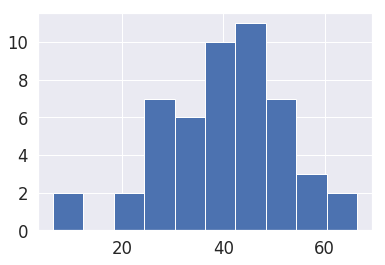

In [6]:
g = plt.hist(df['age'])

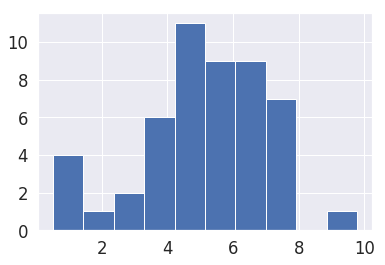

In [7]:
g = plt.hist(df['kilometers'])

Text(0.5, 1.0, 'Scatter plot of kilometers walked in a day vs age')

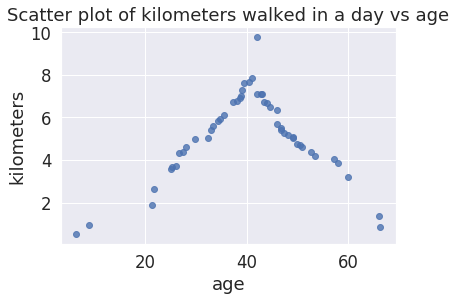

In [8]:
# plot kilometers vs. age
ax = sns.regplot(x='age', y='kilometers', data=df, fit_reg=False)
ax.set_title('Scatter plot of kilometers walked in a day vs age')

Evidentemente, la relación entre ambas variables es no lineal (hemos obligado a que sea así). Intentemos ajustar a los datos un modelo basado en una parábola, que es un polinomio de grado 2:

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'kilometers'
y = df[y_column]
# Define our independent variables
x_columns = ['age']
X = df[x_columns]

# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training = pd.concat([pd.DataFrame({'kilometers' : y_train}), X_train], axis=1)

model = sm.ols(formula = 'kilometers ~ np.power(age, 2) + age', data = training).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             kilometers   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     57.38
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           4.57e-12
Time:                        15:08:03   Log-Likelihood:                -52.635
No. Observations:                  40   AIC:                             111.3
Df Residuals:                      37   BIC:                             116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.1822      0.881  

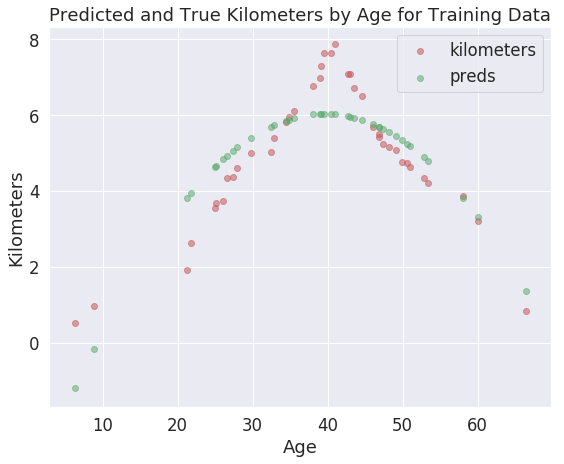

In [10]:
# Get predictions for the training data and plot
training['preds'] = model.predict(training['age'])

plt.figure(figsize=(9,7))
plt.scatter(training['age'], training['kilometers'], alpha=0.5, c='r')
plt.scatter(training['age'], training['preds'], alpha=0.5, c='g')
plt.title('Predicted and True Kilometers by Age for Training Data')
plt.xlabel('Age')
plt.ylabel('Kilometers')
plt.legend()
plt.show();


In [11]:
model.params

Intercept          -4.182212
np.power(age, 2)   -0.006509
age                 0.515704
dtype: float64

Vemos que el modelo se adapta mucho mejor a los datos, aunque aún hay margen de mejora. Podemos emplear un modelo más complejo, con un polinomio de grado 5 con un término logarítmico y una raiz cuadráda (un número elevado a 0.5):

                            OLS Regression Results                            
Dep. Variable:             kilometers   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     90.42
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.94e-19
Time:                        15:08:04   Log-Likelihood:                -20.183
No. Observations:                  40   AIC:                             56.37
Df Residuals:                      32   BIC:                             69.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2296.4742    676

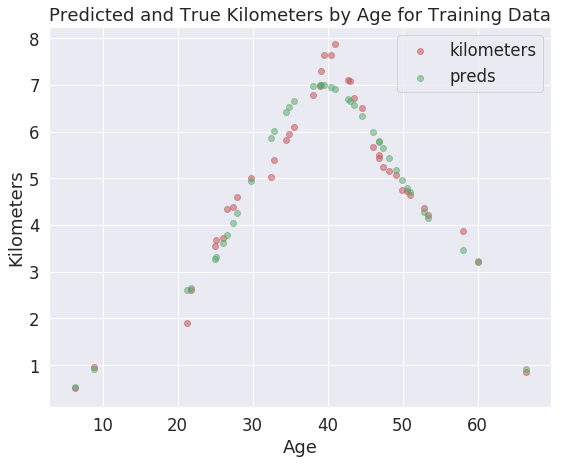

In [12]:
model = sm.ols(formula = 'kilometers ~ np.log(age) + np.power(age, 5) + np.power(age, 4) + np.power(age, 3) + np.power(age, 2) + age + np.power(age, 0.5)', 
               data = training).fit()
print(model.summary())

# Get predictions for the training data and plot
training['preds'] = model.predict(training['age'])

plt.figure(figsize=(9,7))
plt.scatter(training['age'], training['kilometers'], alpha=0.5, c='r')
plt.scatter(training['age'], training['preds'], alpha=0.5, c='g')
plt.title('Predicted and True Kilometers by Age for Training Data')
plt.xlabel('Age')
plt.ylabel('Kilometers')
plt.legend()
plt.show();

Vemos que conforme el modelo se hace más complejo va adaptándose mejor a los datos. Pero hay que tener en cuenta que el modelo que hemos elegido es totalmente arbitrario: ¿por qué un polinomio de grado 7 y no uno de grado 17? Además, conforme vaya aumentando la complejidad del modelo se va incrementando el riesgo de *overfitting*, pudiendo tener modelos polinómicos con un error prácticamente cero de entrenamimento pero enorme en la validación. Por tanto, hay que usar este tipo de modelos con prudencia, solo cuando sepamos perfectamente lo que estamos haciendo.